# Trend Intensity Index

https://www.chartmill.com/documentation/technical-analysis/indicators/63-Trend-Intensity-Indicator   

https://library.tradingtechnologies.com/trade/chrt-ti-trend-intensity-index.html  

https://patternswizard.com/trend-intensity-index/   

https://www.marketvolume.com/technicalanalysis/trendintensityindex.asp  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01 00:00:00-04:00,49.782501,50.439999,49.327499,50.375000,48.282345,271742800
2018-08-02 00:00:00-04:00,50.145000,52.095001,50.087502,51.847500,49.693672,249616000
2018-08-03 00:00:00-04:00,51.757500,52.185001,51.369999,51.997501,49.837444,133789600
2018-08-06 00:00:00-04:00,52.000000,52.312500,51.767502,52.267502,50.096218,101701600
2018-08-07 00:00:00-04:00,52.330002,52.375000,51.689999,51.777500,49.626587,102349600


In [3]:
# P is number of period or days
p = 30
df['SMA'] = df['Adj Close'].rolling(p).mean()
diff = df['Adj Close'] - df['SMA']
pos_count = diff.map(lambda x: 1 if x > 0 else 0).rolling(int(p/2)).sum()
df['TTI'] = 100 * (pos_count) / p

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,TTI
Date,,,,,,,,
2018-08-01 00:00:00-04:00,49.782501,50.439999,49.327499,50.375000,48.282345,271742800,NaN,NaN
2018-08-02 00:00:00-04:00,50.145000,52.095001,50.087502,51.847500,49.693672,249616000,NaN,NaN
2018-08-03 00:00:00-04:00,51.757500,52.185001,51.369999,51.997501,49.837444,133789600,NaN,NaN
2018-08-06 00:00:00-04:00,52.000000,52.312500,51.767502,52.267502,50.096218,101701600,NaN,NaN
2018-08-07 00:00:00-04:00,52.330002,52.375000,51.689999,51.777500,49.626587,102349600,NaN,NaN


In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,TTI
Date,,,,,,,,
2018-09-12 00:00:00-04:00,56.235001,56.250000,54.959999,55.267502,53.157375,197114800,51.816243,3.333333
2018-09-13 00:00:00-04:00,55.880001,57.087502,55.642502,56.602501,54.441406,166825600,52.021545,6.666667
2018-09-14 00:00:00-04:00,56.437500,56.709999,55.630001,55.959999,53.823441,127997200,52.159204,10.000000
2018-09-17 00:00:00-04:00,55.537498,55.737499,54.317501,54.470001,52.390324,148780400,52.244300,13.333333
2018-09-18 00:00:00-04:00,54.447498,55.462502,54.279999,54.560001,52.476891,126286800,52.323656,16.666667


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA,TTI
Date,,,,,,,,
2018-12-24 00:00:00-05:00,37.037498,37.887501,36.647499,36.707500,35.429184,148676800,42.276469,0.0
2018-12-26 00:00:00-05:00,37.075001,39.307499,36.680000,39.292500,37.924171,234330000,41.896028,0.0
2018-12-27 00:00:00-05:00,38.959999,39.192501,37.517502,39.037498,37.678047,212468400,41.590229,0.0
2018-12-28 00:00:00-05:00,39.375000,39.630001,38.637501,39.057499,37.697350,169165600,41.300676,0.0
2018-12-31 00:00:00-05:00,39.632500,39.840000,39.119999,39.435001,38.061718,140014000,41.066943,0.0


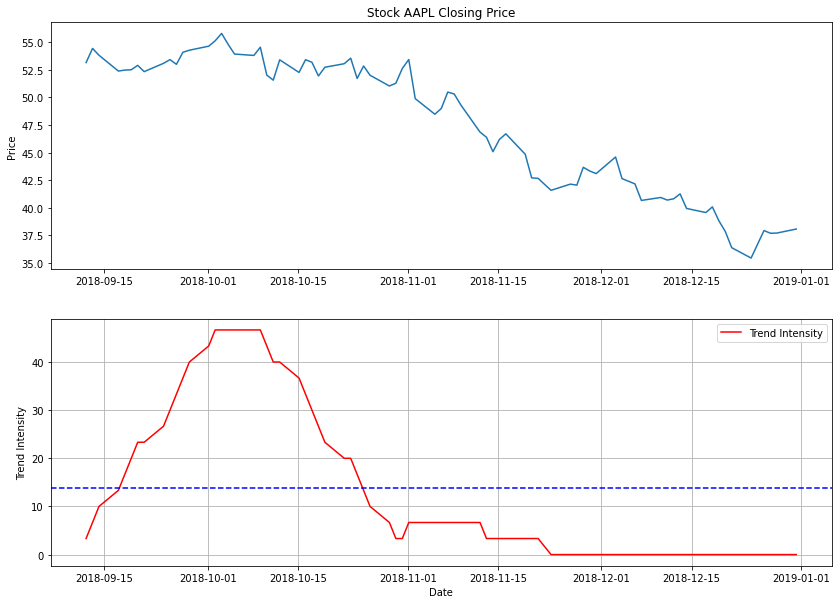

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['TTI'], label='Trend Intensity', color='red')
ax2.axhline(y=df['TTI'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Trend Intensity')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Trend Intensity

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,TTI,VolumePositive
0,17786.166667,56.235001,56.250000,54.959999,55.267502,53.157375,197114800,51.816243,3.333333,False
1,17787.166667,55.880001,57.087502,55.642502,56.602501,54.441406,166825600,52.021545,6.666667,False
2,17788.166667,56.437500,56.709999,55.630001,55.959999,53.823441,127997200,52.159204,10.000000,False
3,17791.166667,55.537498,55.737499,54.317501,54.470001,52.390324,148780400,52.244300,13.333333,False
4,17792.166667,54.447498,55.462502,54.279999,54.560001,52.476891,126286800,52.323656,16.666667,False


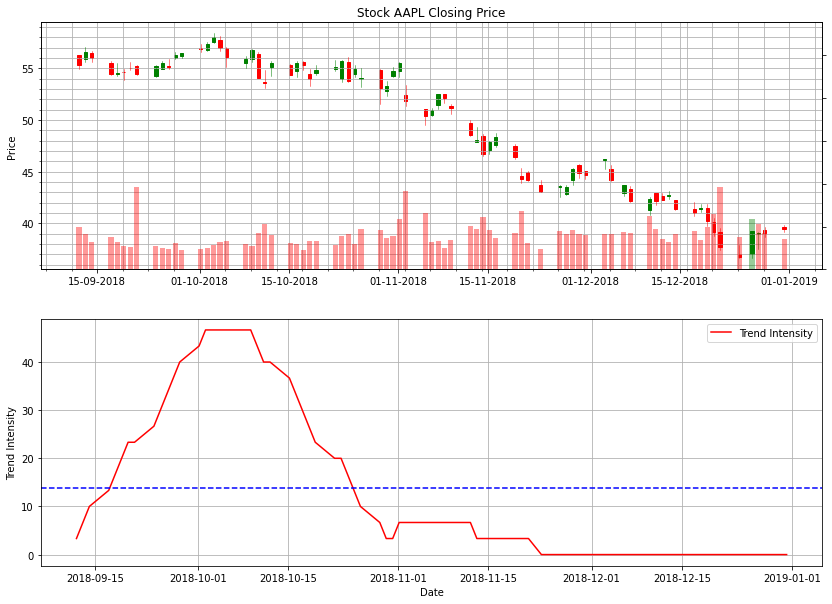

In [11]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['TTI'], label='Trend Intensity', color='red')
ax2.axhline(y=df['TTI'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Trend Intensity')
ax2.set_xlabel('Date')
ax2.legend(loc='best')